In [5]:
!datasets-cli test your_dataset --save_info

Traceback (most recent call last):
  File "c:\users\harish.patil\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\harish.patil\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\harish.patil\Anaconda3\Scripts\datasets-cli.exe\__main__.py", line 7, in <module>
  File "c:\users\harish.patil\anaconda3\lib\site-packages\datasets\commands\datasets_cli.py", line 39, in main
    service.run()
  File "c:\users\harish.patil\anaconda3\lib\site-packages\datasets\commands\test.py", line 110, in run
    module = dataset_module_factory(path)
  File "c:\users\harish.patil\anaconda3\lib\site-packages\datasets\load.py", line 1211, in dataset_module_factory
    raise FileNotFoundError(
FileNotFoundError: Couldn't find a dataset script at C:\Users\harish.patil\OneDrive - Wolters Kluwer\projects\learn\NLP_With_Transformers\ch2_text_classification\your_dataset\your_dataset.py or any data file i

In [28]:
from datasets import list_datasets
from datasets import load_dataset
import matplotlib.pyplot as plt

In [ ]:
all_datastes = list_datasets()
print(len(all_datastes))
all_datastes[:5]

In [3]:
dataset_name = "dair-ai/emotion"
#dataset_name in all_datastes

In [6]:
ds = load_dataset(dataset_name, ignore_verifications=True )

C:\Users\harish.patil\Anaconda3\lib\site-packages\datasets\load.py:1744: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/harish.patil/.cache/huggingface/datasets/dair-ai___parquet/split-1ee75b0441b9d995/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 432809
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [9]:
train_ds = ds['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 432809
})

In [10]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [11]:
train_ds.column_names

['text', 'label']

In [12]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

**Dataset to Dataframe**

In [14]:
import pandas as pd
ds.set_format(type="pandas")

In [15]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 432809
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [16]:
df = ds['train'][:]

In [17]:
df.head(2)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0


In [18]:
df.tail(2)

,text,label
432807,im feeling more eager than ever to claw back w...,1
432808,i give you plenty of attention even when i fee...,0


In [23]:
def label_int2str(row):
    return ds['train'].features['label'].int2str(row)

In [24]:
label_int2str(3)

'anger'

In [26]:
df['labels_names'] = df['label'].apply(label_int2str)

In [27]:
df.head(2)

,text,label,labels_names
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness


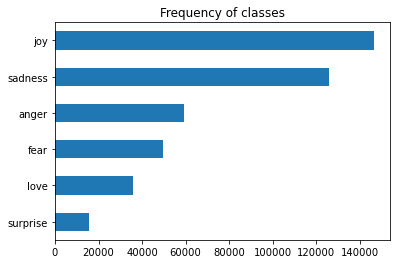

In [29]:
df['labels_names'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of classes")
plt.show()

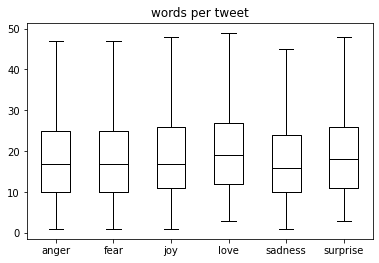

In [36]:
df['words per tweet'] = df['text'].str.split().apply(len)
df.boxplot("words per tweet", by="labels_names", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [37]:
ds.reset_format()

**Text to tokens**

In [40]:
text = "Tokenizatoin is a core task in NLP"

In [42]:
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'o', 'i', 'n', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'i', 'n', ' ', 'N', 'L', 'P']


In [45]:
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}

In [46]:
print(token2idx)

{' ': 0, 'L': 1, 'N': 2, 'P': 3, 'T': 4, 'a': 5, 'c': 6, 'e': 7, 'i': 8, 'k': 9, 'n': 10, 'o': 11, 'r': 12, 's': 13, 't': 14, 'z': 15}


In [60]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[4, 11, 9, 7, 10, 8, 15, 5, 14, 11, 8, 10, 0, 8, 13, 0, 5, 0, 6, 11, 12, 7, 0, 14, 5, 13, 9, 0, 8, 10, 0, 2, 1, 3]


In [61]:
import torch
import torch.nn.functional as F

In [62]:
input_ids = torch.tensor(input_ids)
input_ids

tensor([ 4, 11,  9,  7, 10,  8, 15,  5, 14, 11,  8, 10,  0,  8, 13,  0,  5,  0,
         6, 11, 12,  7,  0, 14,  5, 13,  9,  0,  8, 10,  0,  2,  1,  3])

In [63]:
one_hot_encoding = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encoding.shape

#in tf ---> tf.one_hot and num_classes is equal to depth

torch.Size([34, 16])

In [66]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor Index: {input_ids[0]}")
print(f"One-Hot: {one_hot_encoding[0]}")

Token: T
Tensor Index: 4
One-Hot: tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
